In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

 98% 1.05G/1.06G [00:06<00:00, 181MB/s]
100% 1.06G/1.06G [00:06<00:00, 180MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256, 256)
)
validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# Normalize and ranges the value between 0 to 1
def process(image, label):
    image = tf.cast(image/255. , tf.float32)
    return image, label
train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
# create CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                        

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 81s 109ms/step - loss: 1.2957 - accuracy: 0.5865 - val_loss: 0.6090 - val_accuracy: 0.6710
Epoch 2/10
625/625 [==============================] - 67s 107ms/step - loss: 0.5710 - accuracy: 0.6996 - val_loss: 0.7123 - val_accuracy: 0.6562
Epoch 3/10
625/625 [==============================] - 64s 102ms/step - loss: 0.4953 - accuracy: 0.7550 - val_loss: 0.6308 - val_accuracy: 0.6956
Epoch 4/10
625/625 [==============================] - 65s 103ms/step - loss: 0.4318 - accuracy: 0.7983 - val_loss: 0.6103 - val_accuracy: 0.7182
Epoch 5/10
625/625 [==============================] - 65s 104ms/step - loss: 0.3719 - accuracy: 0.8334 - val_loss: 0.5857 - val_accuracy: 0.7084
Epoch 6/10
625/625 [==============================] - 64s 102ms/step - loss: 0.3203 - accuracy: 0.8608 - val_loss: 0.4276 - val_accuracy: 0.8180
Epoch 7/10
625/625 [==============================] - 65s 102ms/step - loss: 0.2229 - accuracy: 0.9107 - val_loss: 0.5371 - val_ac

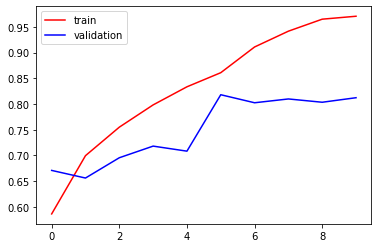

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

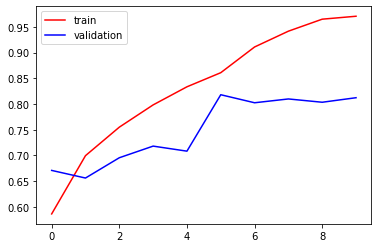

In [ ]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

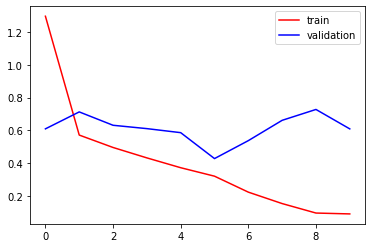

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

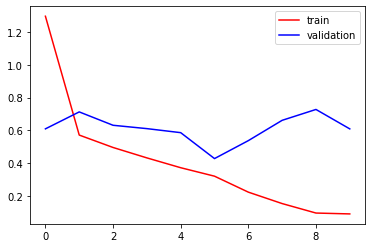

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
import cv2

In [ ]:
test_img = cv2.imread('/content/cat.jpg')

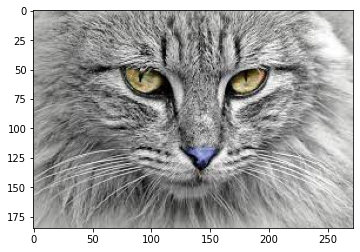

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(185, 272, 3)

In [ ]:
test_img = cv2.resize(test_img,(255, 255))

In [ ]:
test_input = test_img.reshape((1,255,255,3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 91ms/step


array([[0.]], dtype=float32)